In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
class Problem:
    name = ''
    dimension = 0
    best_known = 0
    
    def __init__(self, name, dimension, best_known):
        self.name = name
        self.dimension = dimension
        self.best_known = best_known
        self.nodes = np.zeros((dimension, 2))

In [3]:
def read_tsp_problem(filename):
	with open(filename) as f:
		lines = f.readlines()

	name, dimension, best_known = '', 0, 0
	for i, l in enumerate(lines):
		if l.startswith('NAME'):
			name = l.split(':')[1].strip()
		elif l.startswith('DIMENSION'):
			dimension = int(l.split(':')[1].strip())
		elif l.startswith('BEST_KNOWN'):
			best_known = int(l.split(':')[1].strip())
			problem = Problem(name, int(dimension), int(best_known))
		elif i > 6 and not l.startswith('EOF'):
			idx, x, y = l.split()
			problem.nodes[int(idx)-1] = [float(x), float(y)]
	return problem

In [4]:
def plot_tour(P, tour):
    points = np.zeros((len(tour), 2))
    labels = []
    for i,p in enumerate(tour):
        points[i] = P.nodes[p]
        labels.append(str(p))
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    ax.plot(points[:,0], points[:,1], marker='o')
    # for i in range(len(tour)):
    #     ax.annotate(labels[i], (points[i,0], points[i,1]))
    plt.show()

783
Valid:  True


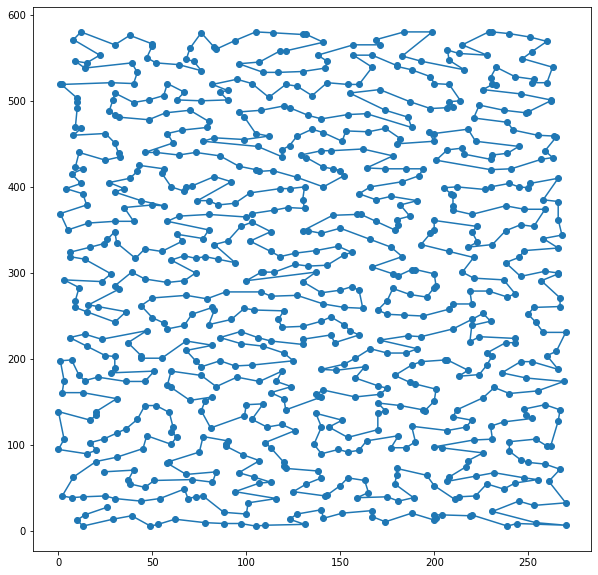

In [6]:
P = read_tsp_problem('./ACO/src/main/resources/problems/rat783.tsp')
print(len(P.nodes))
tour =  96,99,79,69,66,80,82,75,97,93,106,110,119,151,142,136,132,115,111,94,88,76,73,62,47,38,28,32,57,52,46,64,45,40,44,56,51,48,55,87,109,114,126,152,135,150,155,161,183,195,194,174,159,154,146,138,122,116,124,145,184,171,179,185,204,215,214,234,265,269,241,235,238,229,230,247,245,254,275,276,288,304,312,301,316,293,277,272,273,298,290,285,266,255,267,257,258,268,280,289,292,305,315,306,299,291,302,310,294,311,317,325,335,329,321,320,332,344,346,349,331,324,345,352,338,322,318,326,334,357,365,370,364,375,376,369,371,359,353,350,380,385,379,374,390,410,392,407,408,409,418,416,417,433,436,447,440,434,430,438,456,466,482,476,455,448,419,423,429,425,432,421,404,391,388,396,406,386,381,358,355,343,327,342,351,362,383,394,389,400,422,428,435,444,451,457,465,452,424,442,437,454,462,459,472,485,491,494,490,499,500,506,504,520,540,535,534,528,514,512,518,517,551,556,546,539,530,538,560,568,578,561,553,550,533,529,516,507,511,505,484,483,481,471,498,510,525,532,547,559,567,575,595,579,585,593,610,625,623,637,639,664,671,682,703,696,708,704,717,734,724,737,733,746,768,777,760,771,764,759,744,735,731,721,738,742,757,775,758,756,767,778,776,772,773,765,754,753,736,732,718,719,720,725,739,747,761,762,769,779,780,745,740,723,741,755,751,750,763,781,782,774,770,766,752,743,728,711,710,713,716,727,714,695,702,693,686,681,676,657,655,662,669,646,642,634,624,622,619,601,584,582,573,566,580,603,605,592,581,591,594,607,615,636,628,631,614,609,617,638,630,632,613,629,635,621,608,602,586,606,612,618,616,620,627,648,656,660,668,665,650,645,652,653,641,649,661,688,692,672,663,666,667,673,675,701,707,715,722,729,730,749,748,726,700,699,709,685,694,698,683,706,712,697,691,690,680,674,679,689,705,684,678,670,687,677,658,651,647,644,654,659,643,640,633,626,611,596,597,589,598,587,577,565,562,563,555,541,557,564,569,576,583,590,599,600,604,588,574,570,571,572,558,552,542,526,521,523,519,513,492,488,479,473,486,496,495,493,468,469,463,475,458,445,431,415,401,399,413,414,402,387,384,367,372,382,363,347,339,337,336,348,360,361,377,378,368,373,395,397,411,426,439,449,464,474,487,477,467,453,446,450,470,480,478,503,502,509,497,501,508,524,527,536,543,531,544,548,545,537,549,554,522,515,489,461,460,443,441,427,420,398,412,405,403,393,366,356,354,340,328,313,314,284,279,253,264,263,246,237,233,217,213,222,206,191,177,173,165,157,166,140,129,128,153,143,123,120,125,117,137,163,181,172,164,149,158,182,187,200,196,190,188,202,219,227,228,243,259,262,270,271,251,240,244,260,278,283,295,296,303,308,297,323,330,341,333,319,307,309,300,287,282,281,286,274,261,252,250,256,236,225,220,212,209,218,211,210,208,189,205,216,224,232,249,231,239,223,242,248,226,221,203,207,201,186,160,178,197,199,175,162,168,156,139,127,107,104,101,98,84,70,63,58,60,67,85,81,61,49,53,41,50,71,91,102,92,68,43,54,59,72,65,74,83,86,95,90,77,89,103,112,118,130,131,144,147,167,169,176,180,193,198,192,170,134,133,148,141,121,113,108,105,100,78,39,37,42,33,12,5,10,3,27,23,26,25,20,15,31,13,21,34,30,19,35,29,18,7,4,2,9,8,11,17,6,1,22,16,0,14,24,36
print('Valid: ', sum(tour) == sum(range(P.dimension)))
plot_tour(P, tour)

[1, 2, 4, 3, 5, 6, 7, 8]

In [39]:
best = [ 1,2,3,4,5,6,7,8]
best[1:3]

[2, 3]